# Web scraping


This Jupyter notebook includes code to get you started with web scraping. We will use a package called BeautifulSoup to collect the data from the web. Once data has been collected its then saved it into a local .csv file. Then one can start with analysis.

In [47]:
# Import necessary libraries

from bs4 import BeautifulSoup
import requests
import pandas as pd

In [48]:


base_url = 'https://www.airlinequality.com/airline-reviews/british-airways'

pages=10
page_size=100

reviews = []
cabin_flown = []
route =[]
seat_comfort = []
cabin_staff_service = []
food_and_beverages = []
ground_service = []
value_for_money = []
recommended =[]
rating_value = []


for i in range(1, pages + 1):
    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data.
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page.
    page = requests.get(url)

    # Parse content.
    content = page.content
    soup = BeautifulSoup(content, "html.parser")
    for para in soup.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    print(f"   ---> {len(reviews)} total reviews")
    

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [49]:
#extracting rating value
rating_value = [span.text.strip() for span in soup.find_all("span", {"itemprop": "ratingValue"})]

#extracting recommended
for header in soup.find_all("td", class_="review-rating-header recommended"):
    value_td = header.find_next_sibling("td", class_="review-value")
    if value_td:
        recommended.append(value_td.text.strip())


In [50]:

#function for text extraction
def extract_text_value(soup, header_class):
    """
    Extracts the value from a <td> based on a given header class.

    Parameters:
    soup (BeautifulSoup): Parsed HTML content
    header_class (str): The class name of the <td> containing the header text

    Returns:
    List: A list of extracted values corresponding to the given header
    """
    values = []
    for header in soup.find_all("td", class_=f"review-rating-header {header_class}"):
        value_td = header.find_next_sibling("td", class_="review-value")  # Find the value
        if value_td:
            values.append(value_td.get_text(strip=True))
        else:
            values.append("N/A")  # Append 'N/A' if value is missing
    return values


In [51]:
#function for star rating extraction
def extract_star_rating(soup, header_class):
    """
    Extracts the star rating based on a given header class.

    Parameters:
    soup (BeautifulSoup): Parsed HTML content
    header_class (str): The class name of the <td> containing the header text

    Returns:
    List: A list of extracted ratings (1-5) corresponding to the given header
    """
    ratings = []
    for header in soup.find_all("td", class_=f"review-rating-header {header_class}"):
        rating_td = header.find_next_sibling("td", class_="review-rating-stars stars")  # Find the rating container
        if rating_td:
            stars_filled = len(rating_td.find_all("span", class_="star fill"))  # Count filled stars
            ratings.append(stars_filled)
        else:
            ratings.append(0)  # Append 0 if no rating is found
    return ratings


In [52]:
cabin_flown.extend(extract_text_value(soup, "cabin_flown"))
route.extend(extract_text_value(soup, "route"))

In [53]:
seat_comfort.extend(extract_star_rating(soup, "seat_comfort"))
cabin_staff_service.extend(extract_star_rating(soup, "cabin_staff_service"))
food_and_beverages.extend(extract_star_rating(soup, "food_and_beverages"))
ground_service.extend(extract_star_rating(soup, "ground_service"))
value_for_money.extend(extract_star_rating(soup, "value_for_money"))

In [54]:
# Find the maximum length among all lists
max_length = max(
    len(reviews), len(cabin_flown), len(route), len(seat_comfort),
    len(cabin_staff_service), len(food_and_beverages), len(ground_service),
    len(value_for_money), len(recommended), len(rating_value)
)

# Function to extend lists to match the max_length
def pad_list(lst, max_length):
    while len(lst) < max_length:
        lst.append("N/A")  # You can use None if you prefer

# Apply padding to all lists
pad_list(reviews, max_length)
pad_list(cabin_flown, max_length)
pad_list(route, max_length)
pad_list(seat_comfort, max_length)
pad_list(cabin_staff_service, max_length)
pad_list(food_and_beverages, max_length)
pad_list(ground_service, max_length)
pad_list(value_for_money, max_length)
pad_list(recommended, max_length)
pad_list(rating_value, max_length)

# Now create the DataFrame
df = pd.DataFrame({
    "Review": reviews,
    "Seat Type": cabin_flown,
    "Route": route,
    "Seat Comfort": seat_comfort,
    "Cabin Staff Service": cabin_staff_service,
    "Food & Beverages": food_and_beverages,
    "Ground Service": ground_service,
    "Value for Money": value_for_money,
    "Recommended": recommended,
    "Overall Rating": rating_value
})

df.head(30)  # Display first 30 rows


,Review,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value for Money,Recommended,Overall Rating
0,✅ Trip Verified | The employee at Venice Air...,Business Class,London to San Francisco,3,5,4,5,4,yes,5
1,"✅ Trip Verified | I had only 1 bag with me, ...",Economy Class,Heathrow to Belfast,2,5,5,1,3,no,9
2,✅ Trip Verified | Check in and security at T5 ...,Business Class,London to Singapore,4,5,5,5,5,yes,1
3,Not Verified | LHR T5 BA Gold Wing worked wel...,Economy Class,Toulouse to London,1,1,5,3,1,no,9
4,Not Verified | Very good service on this rout...,Business Class,London Heathrow to Stockholm,3,5,3,5,4,yes,1
5,✅ Trip Verified | Flight mainly let down by ...,Economy Class,Johannesburg to London,1,3,3,2,1,no,8
6,✅ Trip Verified | Another awful experience b...,Business Class,Johannesburg to London,3,3,5,3,4,yes,1
7,"✅ Trip Verified | The service was rude, full...",First Class,London Heathrow to Miami,4,5,5,5,5,yes,7
8,✅ Trip Verified | This flight was a joke. Th...,Business Class,Stockholm to London Heathrow,3,5,4,5,4,yes,9
9,✅ Trip Verified | This time British Airways ...,Economy Class,London to Sydney via Singapore,3,4,3,3,4,yes,8


In [55]:
# Save DataFrame to CSV
df.to_csv("airline_reviews.csv", index=False, encoding="utf-8")

print("CSV file saved successfully!")


CSV file saved successfully!


Now we have dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

Additionally, information on Seat Type, Route, Recommended, Customer ratings on cabin staff service, food and beverages, ground service, value for money and Overall Rating is collected to gain further insights.

# Data Preprocessing

### Step 1: Load the Data
Before analyzing, we need to load the dataset.

In [56]:
# Load the CSV file
df = pd.read_csv("airline_reviews.csv")

# Display the first few rows
df.head()


,Review,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value for Money,Recommended,Overall Rating
0,✅ Trip Verified | The employee at Venice Air...,Business Class,London to San Francisco,3.0,5.0,4.0,5.0,4.0,yes,5.0
1,"✅ Trip Verified | I had only 1 bag with me, ...",Economy Class,Heathrow to Belfast,2.0,5.0,5.0,1.0,3.0,no,9.0
2,✅ Trip Verified | Check in and security at T5 ...,Business Class,London to Singapore,4.0,5.0,5.0,5.0,5.0,yes,1.0
3,Not Verified | LHR T5 BA Gold Wing worked wel...,Economy Class,Toulouse to London,1.0,1.0,5.0,3.0,1.0,no,9.0
4,Not Verified | Very good service on this rout...,Business Class,London Heathrow to Stockholm,3.0,5.0,3.0,5.0,4.0,yes,1.0


### Step 2: Data Cleaning
Now, let's clean the review text by removing numbers, punctuation, extra spaces and converting everything to lower case. This is done so that reviews are standardized for analysis.

In [57]:
#cleaning the text
df["Review"] = df["Review"].str.split('|', expand=True)[1]

import re

# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.strip()  # Remove extra spaces
    return text

# Apply cleaning function to the 'Review' column
df["Cleaned_Review"] = df["Review"].astype(str).apply(clean_text)

# Display cleaned reviews
df[["Cleaned_Review"]].head()



,Cleaned_Review
0,the employee at venice airport checkin was ver...
1,i had only bag with me a carry on trolley eve...
2,check in and security at t quick both gallerie...
3,lhr t ba gold wing worked well pleasant check ...
4,very good service on this route ba th march ca...


In [58]:
df.head()

,Review,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value for Money,Recommended,Overall Rating,Cleaned_Review
0,The employee at Venice Airport checkin was ...,Business Class,London to San Francisco,3.0,5.0,4.0,5.0,4.0,yes,5.0,the employee at venice airport checkin was ver...
1,"I had only 1 bag with me, a carry on trolle...",Economy Class,Heathrow to Belfast,2.0,5.0,5.0,1.0,3.0,no,9.0,i had only bag with me a carry on trolley eve...
2,Check in and security at T5 quick. Both Galle...,Business Class,London to Singapore,4.0,5.0,5.0,5.0,5.0,yes,1.0,check in and security at t quick both gallerie...
3,LHR T5 BA Gold Wing worked well. Pleasant ch...,Economy Class,Toulouse to London,1.0,1.0,5.0,3.0,1.0,no,9.0,lhr t ba gold wing worked well pleasant check ...
4,Very good service on this route BA2710 30th ...,Business Class,London Heathrow to Stockholm,3.0,5.0,3.0,5.0,4.0,yes,1.0,very good service on this route ba th march ca...


### Step 3: Tokenization, Stopwords removal, and POS-tagging
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization). This is done for easier machine analysis, helping machines understand human language.

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tags indicate the grammatical category of a word, such as noun, verb, adjective, adverb, etc. The goal of POS tagging is to determine a sentence’s syntactic structure and identify each word’s role in the sentence. It is essential to preserve the context of the word and is essential for Lemmatization.

In [59]:
import nltk

nltk.download('punkt')                          # Tokenizer
nltk.download('stopwords')                      # Stopword list
nltk.download('averaged_perceptron_tagger')     # POS tagger
nltk.download('wordnet')                        # Stopword list
nltk.download('punkt_tab')                      # Tokenizer
nltk.download('averaged_perceptron_tagger_eng') # POS tagger



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ishitarajpal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ishitarajpal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ishitarajpal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ishitarajpal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ishitarajpal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/ishitarajpal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [60]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag

In [61]:
pos_dict = {"J":wordnet.ADJ, "V":wordnet.VERB, "N":wordnet.NOUN, "R":wordnet.ADV}

def handle_tokenization_stopwords_postags(text):
    # Tokenization.
    tokenized_text = word_tokenize(text)
    # POS-tagging.
    tags = pos_tag(tokenized_text)
    new_text_list = []
    for word, tag in tags:
        # Stopword removal.
        if word not in stopwords.words("english"):
          new_text_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_text_list 

df["POS_tagged_reviews"] = df["Cleaned_Review"].apply(handle_tokenization_stopwords_postags)
df.head()

,Review,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value for Money,Recommended,Overall Rating,Cleaned_Review,POS_tagged_reviews
0,The employee at Venice Airport checkin was ...,Business Class,London to San Francisco,3.0,5.0,4.0,5.0,4.0,yes,5.0,the employee at venice airport checkin was ver...,"[(employee, n), (venice, n), (airport, n), (ch..."
1,"I had only 1 bag with me, a carry on trolle...",Economy Class,Heathrow to Belfast,2.0,5.0,5.0,1.0,3.0,no,9.0,i had only bag with me a carry on trolley eve...,"[(bag, n), (carry, n), (trolley, n), (everyone..."
2,Check in and security at T5 quick. Both Galle...,Business Class,London to Singapore,4.0,5.0,5.0,5.0,5.0,yes,1.0,check in and security at t quick both gallerie...,"[(check, n), (security, n), (quick, a), (galle..."
3,LHR T5 BA Gold Wing worked well. Pleasant ch...,Economy Class,Toulouse to London,1.0,1.0,5.0,3.0,1.0,no,9.0,lhr t ba gold wing worked well pleasant check ...,"[(lhr, n), (ba, n), (gold, n), (wing, n), (wor..."
4,Very good service on this route BA2710 30th ...,Business Class,London Heathrow to Stockholm,3.0,5.0,3.0,5.0,4.0,yes,1.0,very good service on this route ba th march ca...,"[(good, a), (service, n), (route, n), (ba, n),..."


### Step 4: Lemmatization
Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item, generally known as stem. A stem is responsible for the word's lexical meaning. The two popular techniques of obtaining the stem words are Stemming and Lemmatization.

We will use the Lemmatization process here as Stemming often gives some meaningless root words as it simply chops off some characters in the end, whereas, Lemmatization gives meaningful root words. It is important to note that, lemmatization requires POS tagging of the words, which we have already accomplished in the previous step.

In [62]:
# Obtaining stem-words with Lemmatization.
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def text_lemmatization(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df["Lemmatized_Reviews"] = df["POS_tagged_reviews"].apply(text_lemmatization)
df.head()

,Review,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value for Money,Recommended,Overall Rating,Cleaned_Review,POS_tagged_reviews,Lemmatized_Reviews
0,The employee at Venice Airport checkin was ...,Business Class,London to San Francisco,3.0,5.0,4.0,5.0,4.0,yes,5.0,the employee at venice airport checkin was ver...,"[(employee, n), (venice, n), (airport, n), (ch...",employee venice airport checkin rude us make...
1,"I had only 1 bag with me, a carry on trolle...",Economy Class,Heathrow to Belfast,2.0,5.0,5.0,1.0,3.0,no,9.0,i had only bag with me a carry on trolley eve...,"[(bag, n), (carry, n), (trolley, n), (everyone...",bag carry trolley everyone one board group f...
2,Check in and security at T5 quick. Both Galle...,Business Class,London to Singapore,4.0,5.0,5.0,5.0,5.0,yes,1.0,check in and security at t quick both gallerie...,"[(check, n), (security, n), (quick, a), (galle...",check security quick gallery lounge pretty m...
3,LHR T5 BA Gold Wing worked well. Pleasant ch...,Economy Class,Toulouse to London,1.0,1.0,5.0,3.0,1.0,no,9.0,lhr t ba gold wing worked well pleasant check ...,"[(lhr, n), (ba, n), (gold, n), (wing, n), (wor...",lhr ba gold wing work well pleasant check fa...
4,Very good service on this route BA2710 30th ...,Business Class,London Heathrow to Stockholm,3.0,5.0,3.0,5.0,4.0,yes,1.0,very good service on this route ba th march ca...,"[(good, a), (service, n), (route, n), (ba, n),...",good service route ba th march cabin crew wo...


### Step 5: Sentiment Analysis (VADER)
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analyzer that has been trained on social media text. Here, SentimentIntensityAnalyzer() is an object and polarity_scores is a method which will give us scores of the following categories:

Positive
Negative
Neutral
Compound
The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). The more Compound score closer to +1, the higher the positivity of the text. For our Analyser, we will consider compound score of >=0.5 as positive, and compund score of <0 as negative.

In [ ]:
#pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [64]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ishitarajpal/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [65]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_analysis(sentiment_text):
    score = analyzer.polarity_scores(sentiment_text)
    return score["compound"]

df["VADER_compound_score"] = df["Lemmatized_Reviews"].apply(vader_analysis)

# function to analyse
def sentiment_classifier(compound_score):
    if compound_score >= 0.5:
        return "Positive"
    elif compound_score < 0 :
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["VADER_compound_score"].apply(sentiment_classifier)
df.head()

,Review,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value for Money,Recommended,Overall Rating,Cleaned_Review,POS_tagged_reviews,Lemmatized_Reviews,VADER_compound_score,Sentiment
0,The employee at Venice Airport checkin was ...,Business Class,London to San Francisco,3.0,5.0,4.0,5.0,4.0,yes,5.0,the employee at venice airport checkin was ver...,"[(employee, n), (venice, n), (airport, n), (ch...",employee venice airport checkin rude us make...,-0.8807,Negative
1,"I had only 1 bag with me, a carry on trolle...",Economy Class,Heathrow to Belfast,2.0,5.0,5.0,1.0,3.0,no,9.0,i had only bag with me a carry on trolley eve...,"[(bag, n), (carry, n), (trolley, n), (everyone...",bag carry trolley everyone one board group f...,-0.4588,Negative
2,Check in and security at T5 quick. Both Galle...,Business Class,London to Singapore,4.0,5.0,5.0,5.0,5.0,yes,1.0,check in and security at t quick both gallerie...,"[(check, n), (security, n), (quick, a), (galle...",check security quick gallery lounge pretty m...,0.8360,Positive
3,LHR T5 BA Gold Wing worked well. Pleasant ch...,Economy Class,Toulouse to London,1.0,1.0,5.0,3.0,1.0,no,9.0,lhr t ba gold wing worked well pleasant check ...,"[(lhr, n), (ba, n), (gold, n), (wing, n), (wor...",lhr ba gold wing work well pleasant check fa...,0.9913,Positive
4,Very good service on this route BA2710 30th ...,Business Class,London Heathrow to Stockholm,3.0,5.0,3.0,5.0,4.0,yes,1.0,very good service on this route ba th march ca...,"[(good, a), (service, n), (route, n), (ba, n),...",good service route ba th march cabin crew wo...,-0.7579,Negative


In [66]:
sentiment_counts = df["Sentiment"].value_counts()
sentiment_counts

Sentiment
Negative    449
Positive    447
Neutral     104
Name: count, dtype: int64

In [67]:
df.to_csv("processed_reviews.csv", index=False)


# Data Visualisation

### Pie Chart

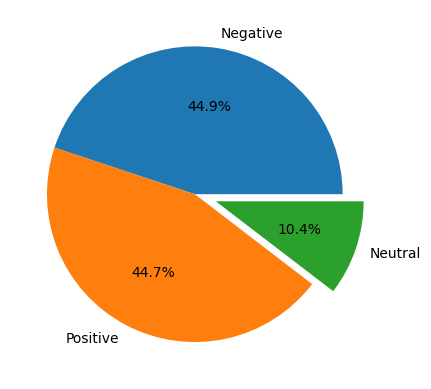

In [68]:
import matplotlib.pyplot as plt 
import seaborn as sns
  
# Declaring data. 
data = sentiment_counts.values
  
# Define Seaborn color palette to use. 
palette_color = sns.color_palette() 
  
# Plotting data on chart. 
plt.pie(data, labels=sentiment_counts.index, colors=palette_color, explode = (0, 0, 0.15), autopct="%.1f%%") 
  
# Displaying chart. 
plt.show() 

### Word Cloud

In [ ]:
#df["Lemmatized_Reviews"] = df["Lemmatized_Reviews"].astype(str).replace("nan", "")


In [ ]:
#print(df["Lemmatized_Reviews"].apply(lambda x: isinstance(x, str)).all())


True


In [73]:
df.dtypes

Review                   object
Seat Type                object
Route                    object
Seat Comfort            float64
Cabin Staff Service     float64
Food & Beverages        float64
Ground Service          float64
Value for Money         float64
Recommended              object
Overall Rating          float64
Cleaned_Review           object
POS_tagged_reviews       object
Lemmatized_Reviews       object
VADER_compound_score    float64
Sentiment                object
dtype: object

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualize_wordcloud(data):
    # Specify the font path
    font_path = "/System/Library/Fonts/Supplemental/Arial.ttf"

    # Ensure the 'Lemmatized_Reviews' column is a string
    text = " ".join(data.dropna())  # Concatenate all the lemmatized reviews into one string

    # Generate the word cloud with the specified font path
    wordcloud = WordCloud(
        background_color="white",  # Set background color
        max_words=200,  # Max number of words to display
        max_font_size=40,  # Max font size
        scale=4,  # Increase the scale for better resolution
        relative_scaling=0.9,  # Make word sizes relative to frequency
        random_state=7,  # Random seed for reproducibility
        font_path=font_path  # Explicitly set the TrueType font path
    ).generate(text)  # Pass the cleaned text

    # Plot the word cloud
    plt.figure(figsize=(10, 10))  # Set figure size
    plt.imshow(wordcloud, interpolation="bilinear")  # Display word cloud
    plt.axis("off")  # Hide axis
    plt.show()


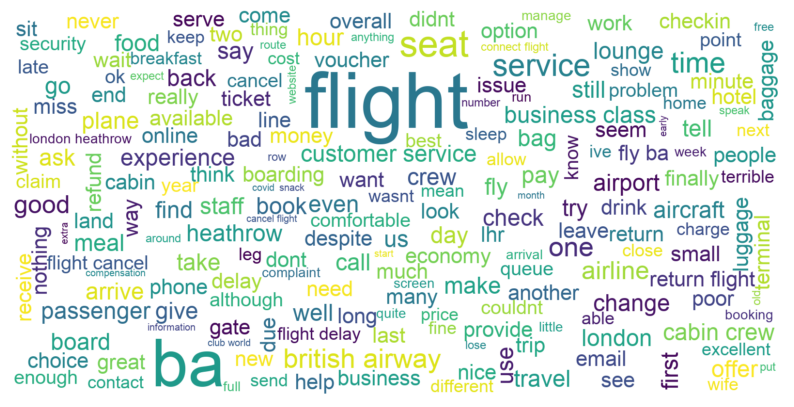

In [76]:
visualize_wordcloud(df["Lemmatized_Reviews"])